In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16 # to uncomment if gpu out of mem

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [5]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [6]:
path = untar_data(URLs.PETS); path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
path_anno = path/'annotations'
path_img = path/'images'

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/leonberger_119.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pomeranian_142.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bombay_88.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_5.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/basset_hound_137.jpg')]

In [10]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [11]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize()

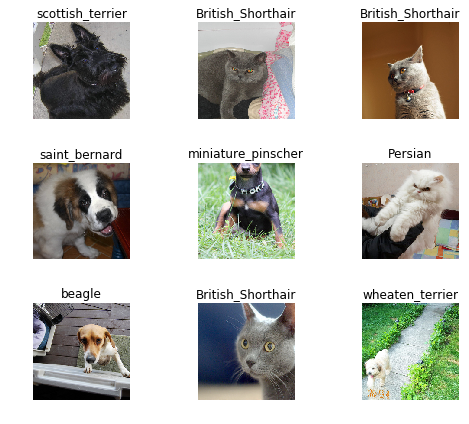

In [12]:
data.show_batch(rows=3, figsize=(7, 6))

In [13]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [14]:
print(data.c)

37


In [15]:
len(data.classes)

37

In [16]:
len(data.classes), data.c

(37, 37)

In [17]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [18]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.390174,0.349250,0.102165
2,0.560638,0.265822,0.087280
3,0.335757,0.228301,0.074425
4,0.262046,0.214289,0.073072


In [20]:
learn.save('stage-1')

In [21]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category leonberger, Category pomeranian, Category Bombay, Category Ragdoll, Category pomeranian]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 332, 500), Image (3, 225, 300), Image (3, 150, 200), Image (3, 375, 500), Image (3, 225, 300)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category saint_bernard, Category Maine_Coon, Category great_pyrenees, Category samoyed, Category leonberger]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 375, 500), Image (3, 347, 500), Image (3, 375, 500), Image (3, 454, 500), Image (3, 333, 500)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(6

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

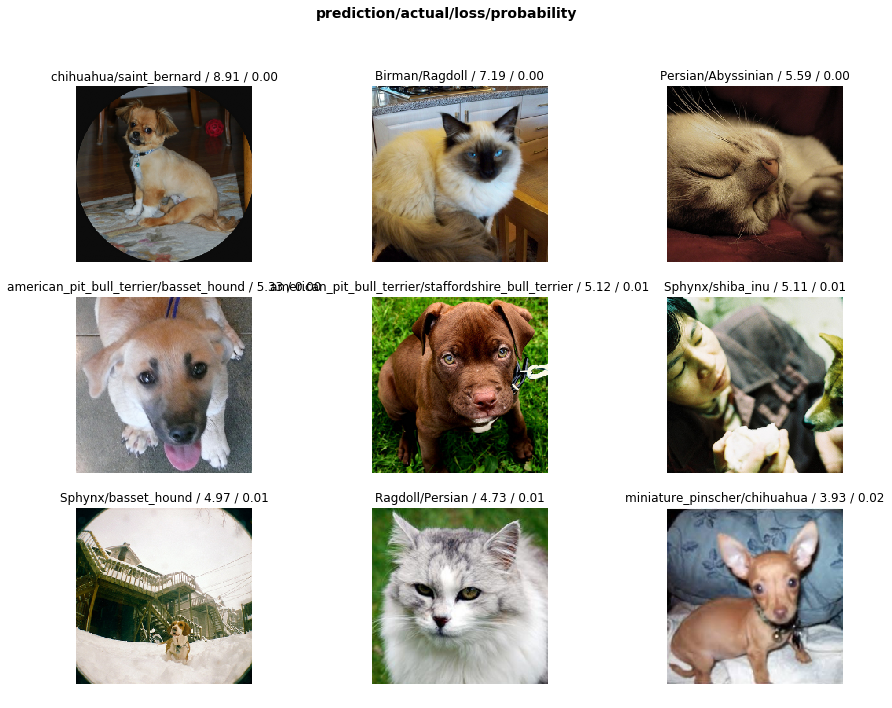

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

In [22]:
doc(interp.plot_top_losses)

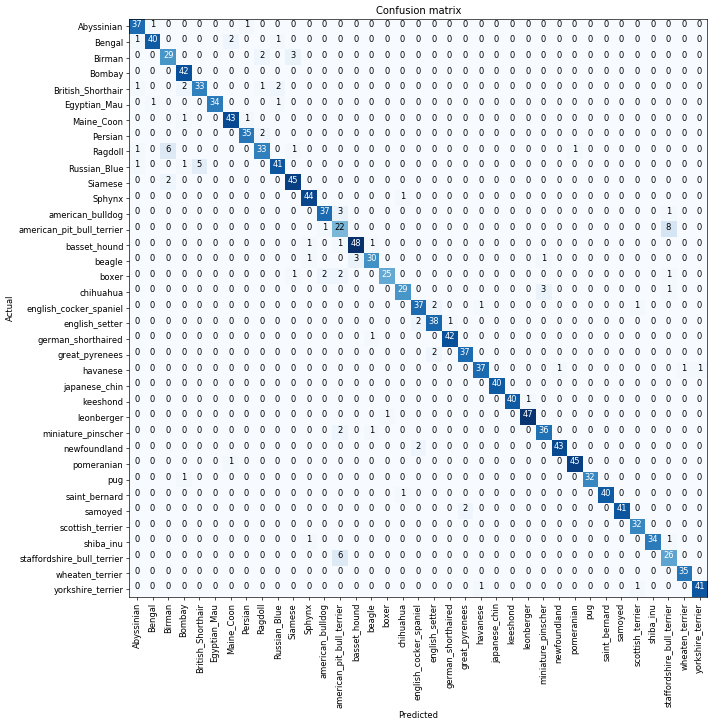

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Ragdoll', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('Birman', 'Siamese', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('chihuahua', 'miniature_pinscher', 3)]

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.565241,0.344565,0.102842


In [28]:
learn.load('stage-1');

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


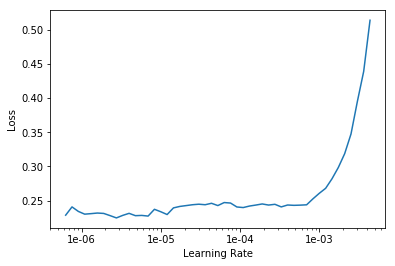

In [30]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.213642,0.206915,0.077131
2,0.210823,0.205223,0.070365


In [ ]:
# resnet50

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), 
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [11]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


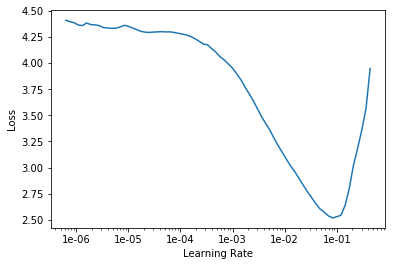

In [12]:
learn.lr_find()
learn.recorder.plot()

In [14]:
# learn.fit_one_cycle(8)
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.299408,0.224947,0.066982
2,0.286709,0.185779,0.058187
3,0.204218,0.164923,0.048038
4,0.169348,0.166485,0.054127


In [17]:
learn.save('stage-1-50')

In [18]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category leonberger, Category pomeranian, Category Bombay, Category Ragdoll, Category pomeranian]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 332, 500), Image (3, 225, 300), Image (3, 150, 200), Image (3, 375, 500), Image (3, 225, 300)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category saint_bernard, Category Maine_Coon, Category great_pyrenees, Category samoyed, Category leonberger]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 375, 500), Image (3, 347, 500), Image (3, 375, 500), Image (3, 454, 500), Image (3, 333, 500)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(6

In [19]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


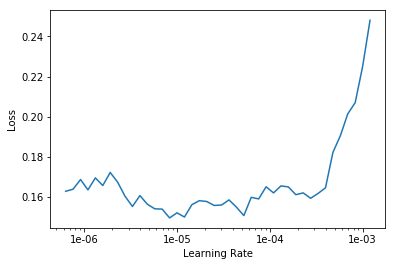

In [20]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))
# learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate
1,0.148747,0.163269,0.053451
2,0.126123,0.148741,0.050068
3,0.104506,0.150840,0.047361


In [26]:
interp = ClassificationInterpretation.from_learner(learn)

In [27]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 11),
 ('Birman', 'Ragdoll', 4),
 ('boxer', 'american_bulldog', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3)]

In [ ]:
# MNIST

In [33]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/jupyter/.fastai/data/mnist_sample')

In [35]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

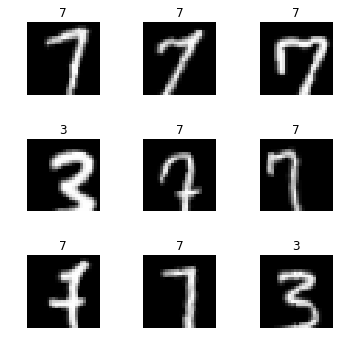

In [40]:
data.show_batch(rows=3, figsize=(5, 5))

In [41]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy
1,0.180742,0.078609,0.971541
2,0.121139,0.039218,0.985280


In [42]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [43]:
data = ImageDataBunch.from_csv(path, df_tfms=tfms, size=28)

[0, 1]

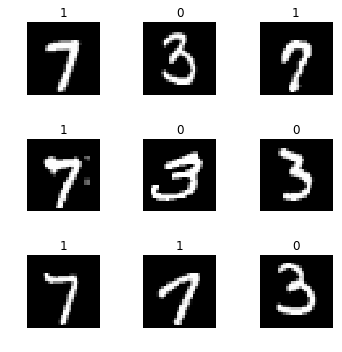

In [44]:
data.show_batch(rows=3, figsize=(5,5))
data.classes